<a href="https://colab.research.google.com/github/UPstartDeveloper/Problem_Solving_Practice/blob/master/Problem_Solving_Practice/miscellaneous/Warm_Up_Analysis_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 - On PDFs


![Question 1 Image](https://i.postimg.cc/qMCwz3ZY/kash-colab-fun-happy-fun-times-hip-hip-hooray.jpg)

We may **assume** that the number of times Colab crashes in Aakash's classes is normally distributed.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

## Step A: Generate a Sample Distribution

In [ ]:
# A: generate a sample dist
mu, sigma = 2.5, 0.7  # mean and standard devivation
classes_periods = 50  # guessing how many classes Kash has taught
samples = np.random.normal(mu, sigma, classes_periods)

In [ ]:
samples.shape

(50,)

## (Optional) Step B: Show the PDF 

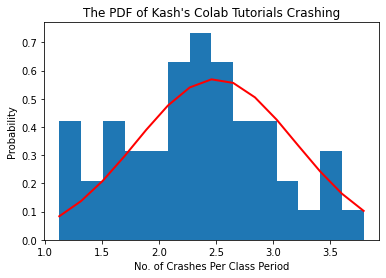

In [ ]:
# the equation for the PDF is borrowed from the NumPy docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
bin_edges, bins_probabilites, ignored = plt.hist(samples, 14, density=True)
plt.plot(bins_probabilites, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp(-(bins_probabilites - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.title("The PDF of Kash's Colab Tutorials Crashing")
plt.ylabel("Probability")
plt.xlabel("No. of Crashes Per Class Period")
plt.show()

## Step C: Compute the CDF

*This the answer btw :) *

In [ ]:
# B: compute the CDF of the distribution, using 2 as the input
probability = np.squeeze(np.sum(np.where(samples < 2, True, False)) / samples.shape) # no. of samples < 2, divided by total count
print(f"The chance of Kash not rage-quitting today is {probability}.")

The chance of Kash not rage-quitting today is 0.28.


## (Optional) Step D: Show the CDF

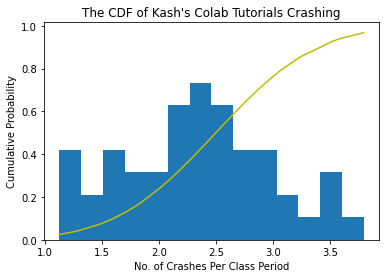

In [ ]:
bin_edges, bins_probabilites, ignored = plt.hist(samples, 14, density=True)
sorted_data = np.sort(samples)
cdf_values = stats.norm.cdf(sorted_data, mu, sigma)
plt.plot(sorted_data, cdf_values, color='y')
plt.title("The CDF of Kash's Colab Tutorials Crashing")
plt.ylabel("Cumulative Probability")
plt.xlabel("No. of Crashes Per Class Period")
plt.show()

# Question 2 - On Hypothesis Testing

## Testing the toxicity of water

Suppose you're trying to measure the Selenium toxicity in your tap water, and obtain the following values for each day:

    
``` 
day	selenium
1	  0.051
2	  0.0505
3	  0.049
4	  0.0516
5	  0.052
6	  0.0508
7	  0.0506
```

The maxiumum level for safe drinking water is 0.05 mg/L -- using this as your alpha, does the selenium tap level exceed the legal limit? 

*Hint 1: you can use a t-test here*

*Hint 2: read this blog on the most common [t-tests in Python, by Ian Gallagher](https://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python).*

In [1]:
!pip install scipy==1.6.0 # needed for doing left-tailed or right-tailed 1-sample t-tests

In [5]:
from scipy import stats


# A: define params of test
alpha = 0.05 # question interviewer: what's the significance level? 
safe_limit_for_population = 0.05
sample_values = [0.051, 0.0505, 0.049, 0.0516, 0.052, 0.0508, 0.0506]
null_hypothesis = "The mean level of selenium in our tap water, based on the \
sample, is less than or equal to 0.05 mg/L with 95% confidence (safe to drink)."
alt_hypothesis = "The mean level of selenium in our tap water, based on the \
sample, is more than 0.05 mg/L with 95% confidence (not safe to drink)."

# B: perform the test - use the "alternative" keyword to say it's right-tailed
t, p = stats.ttest_1samp(sample_values, safe_limit_for_population, alternative='greater')

# C: report the results
print(f"The t-statistic is {t}, alpha is {alpha} and the p-value is {p}.")
if p < alpha:  # the data is not significant enough to keep the null hypothesis
  print("Null hypothesis is rejected! Water needs to be examined more.")
else:
  print("Null hypothesis cannot be rejected! Water is safe :)")

The t-statistic is 2.173499949434694, alpha is 0.05 and the p-value is 0.03635505933982123.
Null hypothesis is rejected! Water needs to be examined more.
